# Predicting Children's Weight Based on Age

## Project Description
This project involves predicting the weight of children up to 24 months old based on their age. The dataset used is from the National Health and Nutrition Examination Survey (NHANES) of 2017-2018. The primary goal is to develop regression models that can accurately predict children's weight using age as the input variable.


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [2]:
# This code cell does not need to be changed
import os
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

dataFileName = os.path.join( "..", "data", "children.csv") 
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


In this project, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?. In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


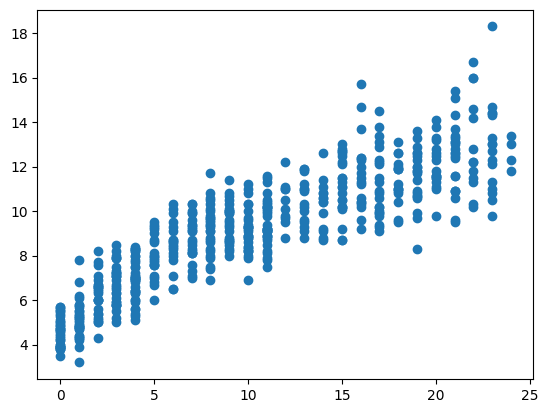

In [3]:
seed = 40
x = dataDF[['age']]
y = dataDF[['weight']] 
plt.scatter(x, y)
dataDF.corr()

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models assume a linear relationship between the input variable (x) and the output (the target variable) that we want to predict.
So it's reasonable to use a linear regression model when there is a strong linear relationship between the input and the output. In our example, and after plotting the data, the weight and age are linear to some degree. 

This is later on confirmed by the Pearson correlation index, which is a statistical method that measures the strength and direction of linear relationship between two quantitative variables. Values closer to 1 means positive correlation, which in our case the value is 0.88.
In short, it seems to be reasonable to apply linear regression to this dataset.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [4]:
# Build linear regression model
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed) 

x_train = train_set[['age']]
y_train = train_set[['weight']] 

x_test = test_set[['age']]
y_test = test_set[['weight']]

lmodel = linear_model.LinearRegression()
lmodel.fit(x_train, y_train)

LinearRegression()

In [5]:
lmodel_type = linear_model.LinearRegression()
estimate_error = cross_val_score(lmodel_type, x, y, scoring='neg_mean_squared_error', cv = 10).mean()
print(estimate_error)

-1.636245443944943


To estimate true error, k-fold cross method was used because by using several partitions, we reduce the chance of having the estimate of the expected error (i.e., test error) influenced by the partition used and, as a result, have a more reliable estimate.

### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

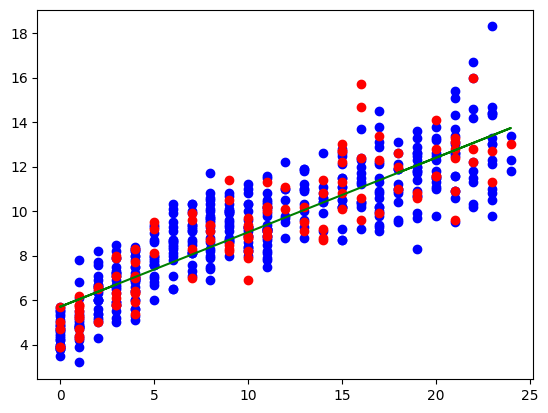

theta0 =  [5.70254107]
theta1 =  [[0.3348116]]


In [6]:
pred_train = lmodel.predict(x_train) 

plt.scatter(x_train, y_train, c = 'b') # train set
plt.scatter(x_test, y_test, c = 'r') # test set

plt.plot(x_train['age'],pred_train, color = 'green') # model
plt.show()

print('theta0 = ',lmodel.intercept_)
print('theta1 = ',lmodel.coef_)
## Equation = y = 0.33*age + 5.7

## Question 2 
Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (7 out of 20)

In [9]:
seed = 10
def trans_data(degree, input):
    polynomial_features = PolynomialFeatures(degree)
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(input) # x is our initial variable tha t has all inputs
    input_df = pd.DataFrame(poly_trans) 
    return input_df

In [10]:
model = linear_model.LinearRegression()
df = pd.DataFrame({'degree' : range(1, 11, 1)})
df['test_error'] = df['degree'].apply(lambda d: cross_val_score(model, trans_data(d, x), y, scoring='neg_mean_squared_error', cv = 10).mean())
df.sort_values('test_error', ascending=False)
## Notice that, with a different seed value the results may vary a bit.

,degree,test_error
9,10,-1.400894
7,8,-1.407284
2,3,-1.409529
3,4,-1.412721
8,9,-1.413353
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


Choosing the model with the lowest cross-validation error ensures the best generalization to new data. In this context, the polynomial model of degree 10 is more balanced in terms of fitting the data and making accurate predictions. It notably outperforms the previously built model, which had an error of 1.636245. This demonstrates the enhanced accuracy and precision of the new degree 10 polynomial model.

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (3 points out of 20)

In [11]:
# Build linear regression model
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed) 

x_train = train_set[['age']]
y_train = train_set[['weight']] 

x_test = test_set[['age']]
y_test = test_set[['weight']]

pmodel = linear_model.LinearRegression()
pmodel.fit(trans_data(10, x_train), y_train) 

print ('theta0 = ',pmodel.intercept_)
print ('theta1 = ',pmodel.coef_)

theta0 =  [4.62855089]
theta1 =  [[ 0.00000000e+00 -3.52785668e-01  1.69330336e+00 -9.85907429e-01
   2.85286110e-01 -4.70378356e-02  4.67688218e-03 -2.85180497e-04
   1.04254711e-05 -2.09617530e-07  1.78147941e-09]]
